In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [71]:
df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [72]:
# i = [[3, 4, 5], [4, 3, 1]]
# # i = np.array(i)
# if not list(i):
#     print("none")
# print(df.__array__)

# i = [2, 4, 5, 2]

df[df["SepalLengthCm"] > 5]["SepalWidthCm"]

0      3.5
5      3.9
10     3.7
14     4.0
15     4.4
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 118, dtype: float64

In [73]:
df.shape

(150, 5)

In [74]:
x = np.array([[[2, 3, 4]],
     [[3, 4, 5]]])

result = np.sqrt(np.sum((x[0] - x[1])**2, axis=1))
result

# np.amin(x, axis=1)
# data = df.to_numpy()

# np.random.uniform(np.amin(data, axis=0), np.argmax(data, axis=0), size=(2, data.shape[1]))

array([1.73205081])

In [75]:
# rand = np.random.randint(df["SepalLengthCm"].min()*10, df["SepalLengthCm"].max()*10) / 10
# rand
df.drop(columns="Id", inplace=True)

In [89]:
class Kmeans():
    # initialisasikan
    def __init__(self, max_iter=100, n_cluster=2, decimal_rand=10, min_diff=0.00001):
        self.inertia = 0
        self.n_cluster = n_cluster
        self.min_diff = min_diff
        self.max_iter = max_iter
        self.centroids = None

    # menghitung jarak uclidean
    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point2 - point1)**2, axis=1))
    
    # melakukan training data
    def fit(self, x):
        # menentukan centroid secara acak (di awal-awal)
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan iterasi
        for iteration in range(self.max_iter):
            # menghilangkan label ke awal
            y = []
            distance_w_cluster = [] # digunakan untuk menghitung distance yang paling kecil (untuk inertia)

            # menentukan labelnya / termasuk cluster apa (dengan menentukan jarak euclidian nya)
            for item in x:
                distances = Kmeans.euclidean_distance(item, self.centroids) # menghitung jarak setiap centroid
                distance_w_cluster.append(distances.min()) # menentukan jarak terkecil
                cluster = np.argmin(distances) # menentukan termasuk cluster apa dengan mencari jarak terkecilnya
                y.append(cluster)

            y = np.array(y)

            # untuk memisahkan antar cluster
            groups = []

            for i in range(self.n_cluster):
                groups.append(np.argwhere(y == i)) # mencari yang mana label sama dengan i 

            # menentukan centroid yang baru
            new_centroid = []
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika ada centroid yang tak punya member
                    new_centroid.append(self.centroids[i]) # gunakan centroid yang sebelumnya
                else:
                    new_centroid.append(np.mean(x[indices], axis=0)[0]) # mencari rata-rata dari centroid sebelumnya
            # print(np.sum(distance_w_cluster))
            # counting the error (inetia)
            self.inertia = np.mean(distance_w_cluster)

            # if the centroid not move the position from previous iteration
            if np.max(self.centroids - np.array(new_centroid)) < self.min_diff:
                break
            else:
                self.centroids = np.array(new_centroid) # update centroid position
            


In [90]:
k_mean = Kmeans(n_cluster=3)
k_mean.fit(df.to_numpy())

In [91]:
k_mean.centroids

array([[7.73895696, 2.97924177, 1.27059922, 1.25895431],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [92]:
k_mean.inertia

0.8560279682448629

[1.943034159037026, 0.8560279682448629, 0.6488394948953339, 0.562781387548742, 0.5193039302812875, 0.5645160359722186, 0.5095854125481707, 0.5387310417607708, 0.4615418320960576, 0.46996668552879667]


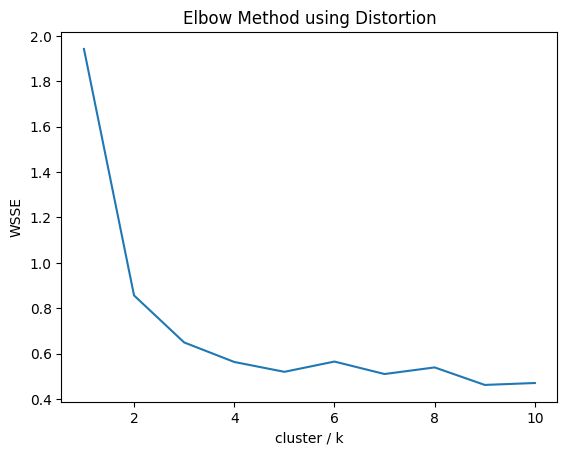

In [93]:
wcss = []
for i in range(1, 11):
    km = Kmeans(n_cluster=i)
    km.fit(df.to_numpy())
    wcss.append(km.inertia)

plt.plot(np.arange(1, 11), wcss)
plt.title("Elbow Method using Distortion")
plt.xlabel("cluster / k")
plt.ylabel("WSSE")
print(wcss)